In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lista_obj = []
lista_tempos = []
for i in range(4,6): 
    with open("objetivos_GA_tunning{}.pkl".format(i), "rb") as infile:
        dados1 = pickle.load(infile)
        objetivos_pandas = pd.DataFrame(dados1)
        objetivos_pandas.iloc[20]
        objetivos_unstack = objetivos_pandas.iloc[20].unstack(level=-1)
        objetivos_unstack
        lista_obj.append(objetivos_unstack.transpose())
        

    with open("tempos_pandas_tunning{}.pkl".format(i), "rb") as infile:
        tempos1 = pickle.load(infile) 
        tempos_pandas = pd.Series(tempos1)
        tempos_unstack = tempos_pandas.unstack(level=-1)
        lista_tempos.append(tempos_unstack.transpose())      

In [3]:



objetivos_pandas = pd.concat(lista_obj)
tempos_pandas = pd.concat(lista_tempos)

In [4]:
lista_obj[1]

10                                                                    \
      0.2                                                                   
        3                                                                   
   0.0100                  0.1000                  0.5000                   
        0                       0                       0                   
     0.35    0.75    1.00    0.35    0.75    1.00    0.35    0.75    1.00   
0  1586.0  1586.0  1602.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   
1  1586.0  1586.0  1602.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   

           ...       1000                                              \
           ...        0.8                                               
        7  ...          3          7                                    
   0.0100  ...     0.0100     0.0001                           0.0010   
        0  ...          0          0                                0   
     0.35  ...       1.00       0.35       0.75       1.00       0.35   
0  2179.0  ...  5983303.0  6574297.0  6574297.0  6574297.0  6574297.0   
1  2179.0  ...  5983303.0  6574297.0  6574298.0  6574298.0  6574297.0   

                                                          
                                                          
                                                          
                            0.0100                        
                                 0                        
        0.75       1.00       0.35       0.75       1.00  
0  6574297.0  6574297.0  6574298.0  6574297.0  6574297.0  
1  6574297.0  6574297.0  6574297.0  6574297.0  6574297.0  

[2 rows x 504 columns]

In [5]:
conjuntos = [10,20,50,100,200,500,1000]
problemas = list(range(1,10))
lista_hs = [0.2,0.4,0.6,0.8]
lista_crossover = [0 , 1]
lista_elitismo = [0.35 , 0.75 , 1]
lista_so_filho_mutante = [0 , 1]
lista_taxa_mutacao = [0.2 , 1 , 5]

In [6]:
objetivos_pandas

10                                                                    \
      0.2                                                                   
        3                                                                   
   0.0100                  0.1000                  0.5000                   
        0                       0                       0                   
     0.35    0.75    1.00    0.35    0.75    1.00    0.35    0.75    1.00   
0  1586.0  1586.0  1602.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   
0  1586.0  1586.0  1602.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   
1  1586.0  1586.0  1602.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   

           ...       1000                                              \
           ...        0.8                                               
        7  ...          3          7                                    
   0.0100  ...     0.0100     0.0001                           0.0010   
        0  ...          0          0                                0   
     0.35  ...       1.00       0.35       0.75       1.00       0.35   
0  2179.0  ...  5983303.0  6574298.0  6574297.0  6574297.0  6574297.0   
0  2179.0  ...  5983303.0  6574297.0  6574297.0  6574297.0  6574297.0   
1  2179.0  ...  5983303.0  6574297.0  6574298.0  6574298.0  6574297.0   

                                                          
                                                          
                                                          
                            0.0100                        
                                 0                        
        0.75       1.00       0.35       0.75       1.00  
0  6574297.0  6574297.0  6574297.0  6574297.0  6574297.0  
0  6574297.0  6574297.0  6574298.0  6574297.0  6574297.0  
1  6574297.0  6574297.0  6574297.0  6574297.0  6574297.0  

[3 rows x 504 columns]

In [7]:
tempos_pandas

10                                                                \
        0.2                                                               
          3                                                               
     0.0100                        0.1000                        0.5000   
          0                             0                             0   
       0.35      0.75      1.00      0.35      0.75      1.00      0.35   
0  7.897563  7.968838  8.272671  7.536479  8.390336  7.957625  8.038831   
0  7.163850  7.377786  7.416212  7.240643  7.784127  7.272825  7.492975   
1  7.110671  7.265495  7.404202  7.005300  7.828069  7.249470  7.344740   

                                 ...       1000                         \
                                 ...        0.8                          
                              7  ...          3           7              
                         0.0100  ...     0.0100      0.0001              
                              0  ...          0           0              
       0.75      1.00      0.35  ...       1.00        0.35       0.75   
0  9.443464  8.816906  8.095334  ...  78.186713  102.397537  80.206084   
0  8.185682  7.561679  7.253567  ...  75.843603   99.530846  82.182376   
1  8.272917  7.801128  7.145938  ...  75.097547   99.668230  77.166532   

                                                                       \
                                                                        
                                                                        
                  0.0010                            0.0100              
                       0                                 0              
        1.00        0.35       0.75       1.00        0.35       0.75   
0  79.109927  101.937022  79.475714  78.258155  102.708267  92.856972   
0  76.930063  101.189385  77.511538  74.836819  102.171670  84.201083   
1  75.574314  101.159857  79.469090  75.916410  100.312984  86.251555   

              
              
              
              
              
        1.00  
0  79.584492  
0  75.618519  
1  76.272778  

[3 rows x 504 columns]

In [8]:
taxa_elitismo = 0.75
usa_coliseu = 0
taxa_mutacao = 1
    
    
    


In [9]:
objetivos_medios = objetivos_pandas.mean()
taxa_elitismo = -1
tipo_crossover = -2
taxa_mutacao = -3


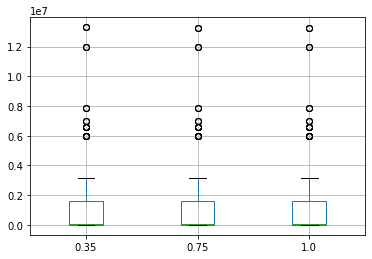

In [10]:
objetivos_medios.unstack(level=taxa_elitismo).boxplot()

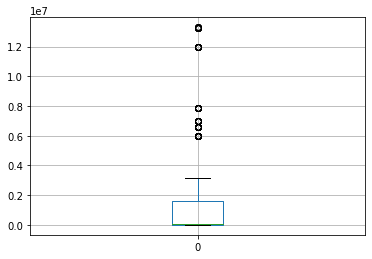

In [11]:
objetivos_medios.unstack(level=tipo_crossover).boxplot()

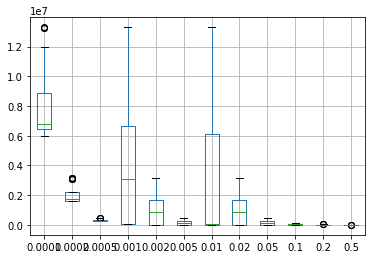

In [12]:
objetivos_medios.unstack(level=taxa_mutacao).boxplot()

In [13]:
objetivos_medios.unstack(level=taxa_mutacao)

0.0001  0.0002  0.0005     0.0010  0.0020  0.0050  \
10   0.2 3 0 0.35           NaN     NaN     NaN        NaN     NaN     NaN   
             0.75           NaN     NaN     NaN        NaN     NaN     NaN   
             1.00           NaN     NaN     NaN        NaN     NaN     NaN   
         7 0 0.35           NaN     NaN     NaN        NaN     NaN     NaN   
             0.75           NaN     NaN     NaN        NaN     NaN     NaN   
...                         ...     ...     ...        ...     ...     ...   
1000 0.8 3 0 0.75  5.983303e+06     NaN     NaN  5983303.0     NaN     NaN   
             1.00  5.983305e+06     NaN     NaN  5983303.0     NaN     NaN   
         7 0 0.35  6.574297e+06     NaN     NaN  6574297.0     NaN     NaN   
             0.75  6.574297e+06     NaN     NaN  6574297.0     NaN     NaN   
             1.00  6.574297e+06     NaN     NaN  6574297.0     NaN     NaN   

                         0.0100  0.0200  0.0500  0.1000  0.2000  0.5000  
10   0.2 3 0 0.35  1.586000e+03     NaN     NaN  1586.0     NaN  1586.0  
             0.75  1.586000e+03     NaN     NaN  1586.0     NaN  1586.0  
             1.00  1.602000e+03     NaN     NaN  1586.0     NaN  1586.0  
         7 0 0.35  2.179000e+03     NaN     NaN  2179.0     NaN  2179.0  
             0.75  2.179000e+03     NaN     NaN  2179.0     NaN  2179.0  
...                         ...     ...     ...     ...     ...     ...  
1000 0.8 3 0 0.75  5.983304e+06     NaN     NaN     NaN     NaN     NaN  
             1.00  5.983303e+06     NaN     NaN     NaN     NaN     NaN  
         7 0 0.35  6.574297e+06     NaN     NaN     NaN     NaN     NaN  
             0.75  6.574297e+06     NaN     NaN     NaN     NaN     NaN  
             1.00  6.574297e+06     NaN     NaN     NaN     NaN     NaN  

[168 rows x 12 columns]

In [14]:
tempos_medios = tempos_pandas.mean()

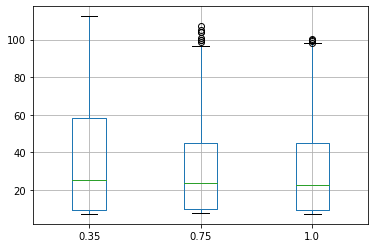

In [15]:
tempos_medios.unstack(level=taxa_elitismo).boxplot()

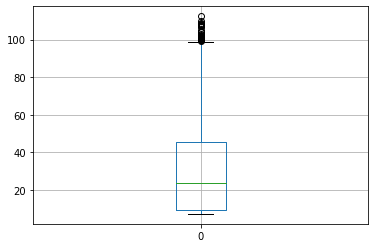

In [16]:
tempos_medios.unstack(level=tipo_crossover).boxplot()

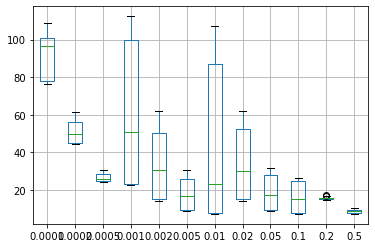

In [17]:
tempos_medios.unstack(level=taxa_mutacao).boxplot()

In [18]:
objs_por_h = objetivos_medios.unstack(level=-5)
tempos_por_h = tempos_medios.unstack(level=-5)

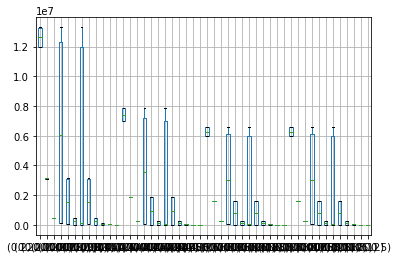

In [19]:
objs_por_h.unstack(level=taxa_mutacao).boxplot()

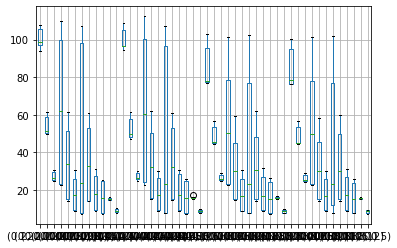

In [20]:
tempos_por_h.unstack(level=taxa_mutacao).boxplot()

In [21]:
tempos_h02 = tempos_por_h.transpose().iloc[0]
tempos_h04 = tempos_por_h.transpose().iloc[1]
tempos_h06 = tempos_por_h.transpose().iloc[2]
tempos_h08 = tempos_por_h.transpose().iloc[3]
objs_h02 = objs_por_h.transpose().iloc[0]
objs_h04 = objs_por_h.transpose().iloc[1]
objs_h06 = objs_por_h.transpose().iloc[2]
objs_h08 = objs_por_h.transpose().iloc[3]

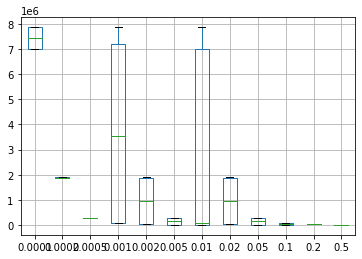

In [22]:
objs_h04.unstack(level=taxa_mutacao).boxplot()

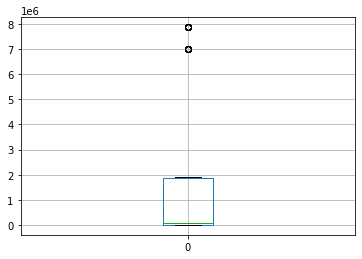

In [23]:
objs_h04.unstack(level=tipo_crossover).boxplot()

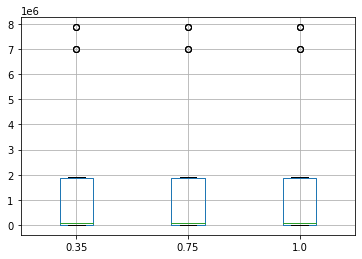

In [24]:
objs_h04.unstack(level=taxa_elitismo).boxplot()

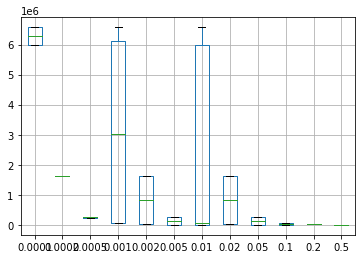

In [25]:
objs_h06.unstack(level=taxa_mutacao).boxplot()

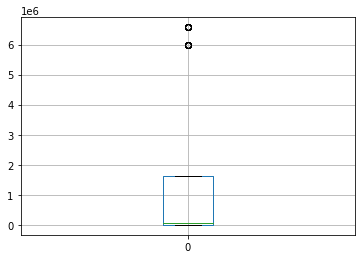

In [26]:
objs_h06.unstack(level=tipo_crossover).boxplot()

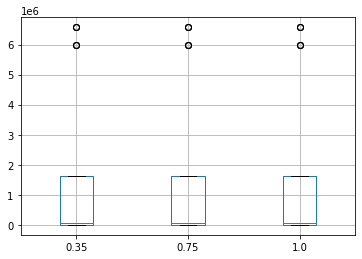

In [27]:
objs_h06.unstack(level=taxa_elitismo).boxplot()

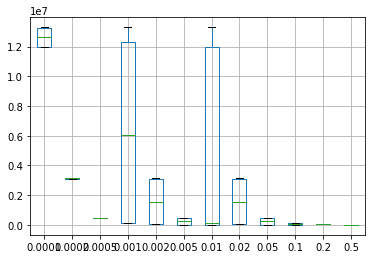

In [28]:
objs_h02.unstack(level=taxa_mutacao).boxplot()

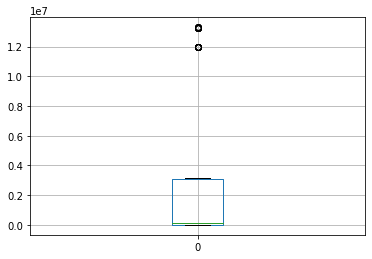

In [29]:
objs_h02.unstack(level=tipo_crossover).boxplot()

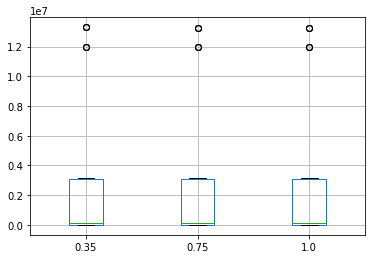

In [30]:
objs_h02.unstack(level=taxa_elitismo).boxplot()

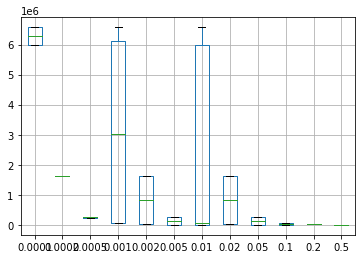

In [31]:
objs_h08.unstack(level=taxa_mutacao).boxplot()

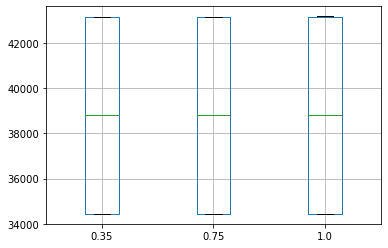

In [32]:
objs_h02[(50)].unstack(level=taxa_elitismo).boxplot()

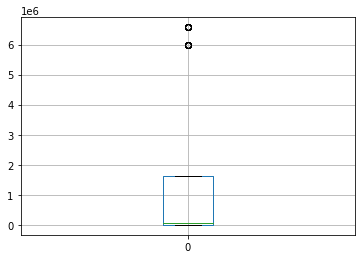

In [33]:
objs_h08.unstack(level=tipo_crossover).boxplot()

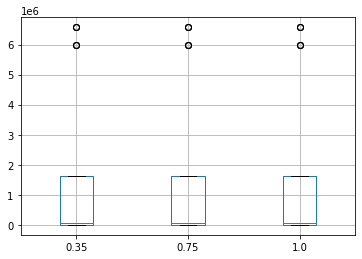

In [34]:
objs_h08.unstack(level=taxa_elitismo).boxplot()

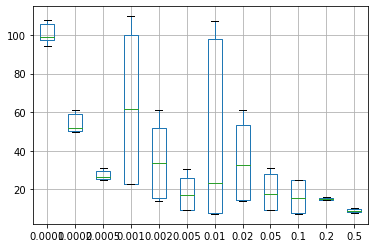

In [35]:
tempos_h02.unstack(level=taxa_mutacao).boxplot()


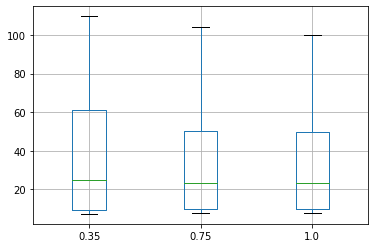

In [36]:
tempos_h02.unstack(level=taxa_elitismo).boxplot()


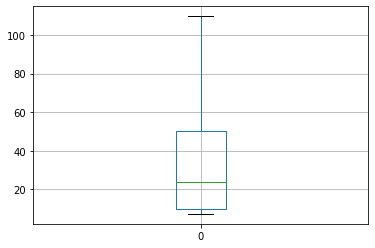

In [37]:
tempos_h02.unstack(level=tipo_crossover).boxplot()

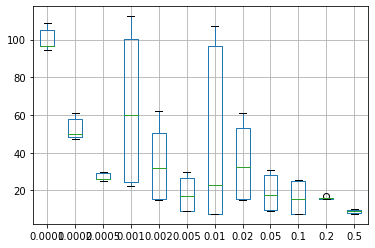

In [38]:
tempos_h04.unstack(level=taxa_mutacao).boxplot()


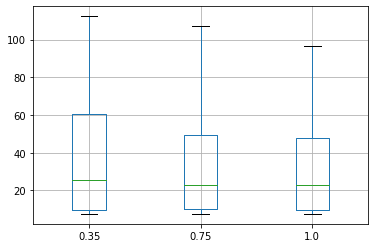

In [39]:
tempos_h04.unstack(level=taxa_elitismo).boxplot()


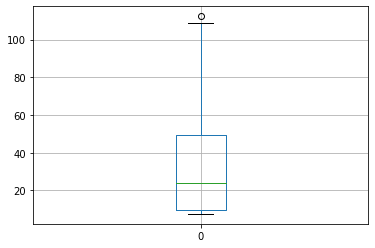

In [40]:
tempos_h04.unstack(level=tipo_crossover).boxplot()

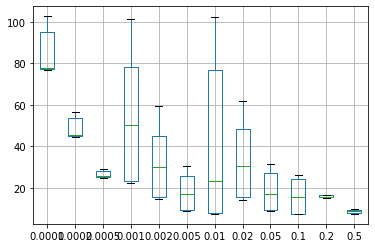

In [41]:
tempos_h06.unstack(level=taxa_mutacao).boxplot()


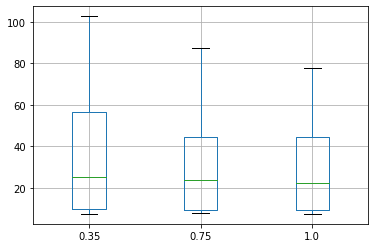

In [42]:
tempos_h06.unstack(level=taxa_elitismo).boxplot()


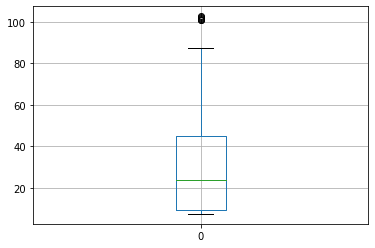

In [43]:
tempos_h06.unstack(level=tipo_crossover).boxplot()

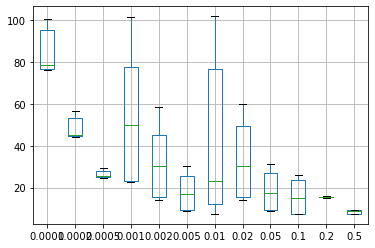

In [44]:
tempos_h08.unstack(level=taxa_mutacao).boxplot()


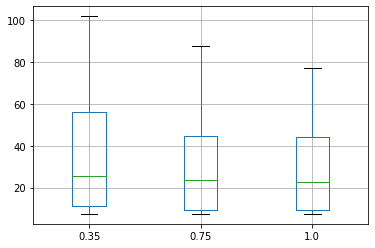

In [45]:
tempos_h08.unstack(level=taxa_elitismo).boxplot()


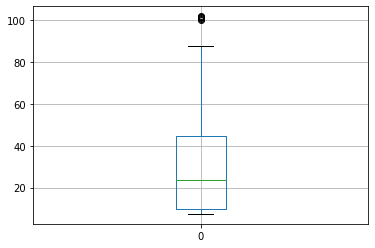

In [46]:
tempos_h08.unstack(level=tipo_crossover).boxplot()

In [47]:
objs_h08

10    3  0.010  0  0.35    7.930000e+02
                   0.75    7.930000e+02
                   1.00    7.930000e+02
         0.100  0  0.35    7.930000e+02
                   0.75    7.930000e+02
                               ...     
1000  7  0.001  0  0.75    6.574297e+06
                   1.00    6.574297e+06
         0.010  0  0.35    6.574297e+06
                   0.75    6.574297e+06
                   1.00    6.574297e+06
Name: 0.8, Length: 126, dtype: float64